In [5]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:04<00:00, 216MB/s]
100% 1.06G/1.06G [00:04<00:00, 270MB/s]


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/dogs_vs_cats/train',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/dogs_vs_cats/test',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"


)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
for i in train_ds:
    print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         ...,
         [ 27.913296 ,  42.913296 ,  72.20473  ],
         [ 28.576172 ,  42.115486 ,  78.0963   ],
         [ 29.647503 ,  41.757812 ,  83.75781  ]],

        [[254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         ...,
         [ 26.492535 ,  41.929688 ,  73.578125 ],
         [ 28.682396 ,  44.205235 ,  79.10818  ],
         [ 30.38171  ,  44.25085  ,  84.15906  ]],

        [[254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         [254.       , 249.       , 255.       ],
         ...,
         [ 25.668114 ,  41.35554  ,  74.517654 ],
         [ 29.348698 ,  45.535503 ,  80.68785  ],
         [ 29.96561  ,  46.79883  ,  85.1621

In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# if i want to fast process

In [11]:
model=Sequential()

In [12]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_ds,epochs=2,validation_data=validation_ds,batch_size =128)

Epoch 1/2
625/625 [==============================] - 66s 87ms/step - loss: 0.5974 - accuracy: 0.6740 - val_loss: 0.5117 - val_accuracy: 0.7498
Epoch 2/2
625/625 [==============================] - 56s 89ms/step - loss: 0.4761 - accuracy: 0.7714 - val_loss: 0.4815 - val_accuracy: 0.7784


In [31]:
model.save('/content/dog_cat.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
import matplotlib.pyplot as plt

In [19]:
dog_image=plt.imread(r"/content/catdog.jpeg")

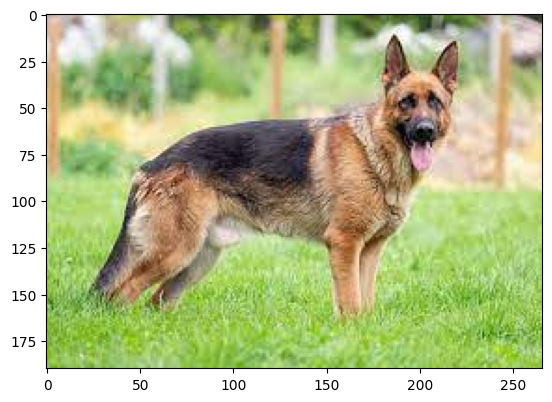

In [20]:
plt.imshow(dog_image)

In [21]:
cat_image=plt.imread(r"/content/cat2.jpeg")

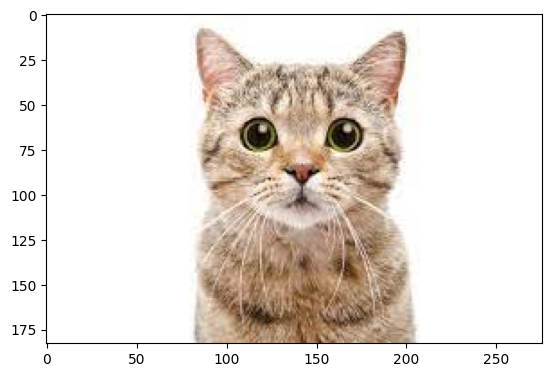

In [22]:
plt.imshow(cat_image)

In [23]:
dog_image.shape

(190, 266, 3)

In [24]:
cat_image.shape

(183, 276, 3)

In [25]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [26]:
dog_resize.shape

(256, 256, 3)

In [27]:
cat_resize.shape

(256, 256, 3)

In [28]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [29]:
dog_resize.shape

(1, 256, 256, 3)

In [30]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [32]:
pred=model.predict(dog_resize)
pred

1/1 [==============================] - 0s 242ms/step


array([[1.]], dtype=float32)

In [33]:
model.predict(cat_resize)

1/1 [==============================] - 0s 16ms/step


array([[4.0523832e-19]], dtype=float32)

In [ ]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog


# Data Augmentaion

In [34]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [39]:
myimg = image.load_img(r"/content/catdog.jpeg",target_size=(250,250))

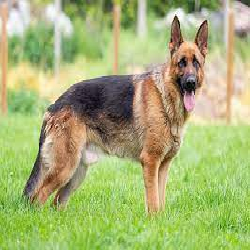

In [40]:
myimg

In [41]:
type(myimg)

PIL.Image.Image

In [44]:
img = image.img_to_array(myimg)

In [45]:
type(img)

numpy.ndarray

In [48]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range =0.3,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

In [49]:
img.shape

(250, 250, 3)

In [51]:
input_image = img.reshape(1,250,250,3)

In [52]:
input_image.shape

(1, 250, 250, 3)

In [61]:
i = 0

for output in datagen.flow(input_image,save_to_dir ='/content/augmented_images1'):
    i +=1
    if i == 10:
      break

In [62]:
train_datagen = ImageDataGenerator(
    shear_range =0.3,
    zoom_range =0.3,
    horizontal_flip = True,
    rescale =1./255
)

In [63]:
train_generator = train_datagen.flow_from_directory(
    '/content/dogs_vs_cats/train',
    target_size =(150,150),
    batch_size =15,
    class_mode ='binary'
)

Found 20000 images belonging to 2 classes.


In [67]:
test_datagen = ImageDataGenerator(
    rescale =1./255
)

In [68]:
test_generator = test_datagen.flow_from_directory(
    '/content/dogs_vs_cats/test',
    target_size =(150,150),
    batch_size =15,
    class_mode ='binary'
)

Found 5000 images belonging to 2 classes.


In [74]:
test_generator

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [70]:
model=Sequential()

In [71]:
# this is my first convolution layer
model.add(Conv2D(24,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(36,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(48,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(64,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(32,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 24)      672       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 36)        7812      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 36)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 48)        15600     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 48)       

In [73]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
model.fit_generator(train_generator,epochs=1,validation_data=test_generator)

<ipython-input-76-2bae73bd2c0b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,epochs=1,validation_data=test_generator)


1334/1334 [==============================] - 150s 112ms/step - loss: 0.6672 - accuracy: 0.5863 - val_loss: 0.6007 - val_accuracy: 0.6714
